In [10]:
library(ComplexHeatmap)
library(tidyverse)
library(circlize)
library(ggplot2)
library(dplyr)
library(scales)
library("RColorBrewer")

In [11]:
cluster <- 1

In [12]:
metadata <- read.csv("/share/Data/hxie/project/202209/esc_xwliu/esc1014_halfday/RNA_analysis/s1014_metadata_X_noM_noXistneg.csv", header = T, row.names = 1)
celllist <- metadata %>% pull(cellname)

In [13]:
pat <- read.csv("/share/Data/hxie/project/202209/esc_xwliu/esc1014_halfday/HiC_analysis/CDP/s1014_Xpat_cdps.csv", row.names = 1, header = T)
mat <- read.csv("/share/Data/hxie/project/202209/esc_xwliu/esc1014_halfday/HiC_analysis/CDP/s1014_Xmat_cdps.csv", row.names = 1, header = T)

In [14]:
mat <- mat[45:138,]
mat <- mat[rev(rownames(mat)),]
pat <- pat[45:138,]
pat <- pat[rev(rownames(pat)),]
# mat 按列转换为z-score
mat <- scale(mat)
pat <- scale(pat)

In [15]:
# metadata <- metadata %>% filter(!is.na(curve2))

In [16]:
cells <- metadata %>% filter(plot_cluster == cluster) %>% pull(cellname) %>% intersect(mat %>% colnames())
mat <- mat %>% as.data.frame
pat <- pat %>% as.data.frame
pat_cells <- pat[cells]
mat_cells <- mat[cells]

In [17]:
mat_curve <- mat_cells[rev(rownames(mat_cells)),] %>% t()
mat_curve <- mat_curve %>% as.data.frame() %>% mutate(cellname = rownames(.)) %>% pivot_longer(-cellname, names_to = "distance", values_to = "value")
mat_curve["allele"] <- "Cast"

pat_curve <- pat_cells[rev(rownames(pat_cells)),] %>% t()
pat_curve <- pat_curve %>% as.data.frame() %>% mutate(cellname = rownames(.)) %>% pivot_longer(-cellname, names_to = "distance", values_to = "value")
pat_curve["allele"] <- "B6"

curve <- rbind(pat_curve,mat_curve)
curve <- curve %>% mutate(distance_lab = ifelse(as.numeric(distance) > 1000000, paste0(round(as.numeric(distance)/1000000, 1),"Mb"),paste0(round(as.numeric(distance)/1000,1),"kb")))
curve$distance <- as.numeric(curve$distance)
xlab <- curve %>% arrange(distance) %>% pull(distance_lab) %>% unique()
curve <- curve %>% mutate(distance_lab = factor(distance_lab, levels = xlab))

curve

cellname,distance,value,allele,distance_lab
<chr>,<dbl>,<dbl>,<chr>,<fct>
d0A1,41498.87,0.09491034,B6,41.5kb
d0A1,45254.83,0.30632199,B6,45.3kb
d0A1,49350.75,0.26403966,B6,49.4kb
d0A1,53817.37,0.68686297,B6,53.8kb
d0A1,58688.26,0.01034568,B6,58.7kb
d0A1,64000.00,0.30632199,B6,64kb
d0A1,69792.49,0.34860432,B6,69.8kb
d0A1,76109.26,0.26403966,B6,76.1kb
d0A1,82997.73,0.64458064,B6,83kb


In [18]:
curve$allele <- factor(curve$allele, levels = c("B6","Cast"))

Warning message in stat_summary(data = subset(curve, allele == "B6"), fun = median, :
“Ignoring unknown parameters: `labels`”


Warning message in stat_summary(data = subset(curve, allele == "Cast"), fun = median, :
“Ignoring unknown parameters: `labels`”
Warning message:
“Removed 4 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_line()`).”


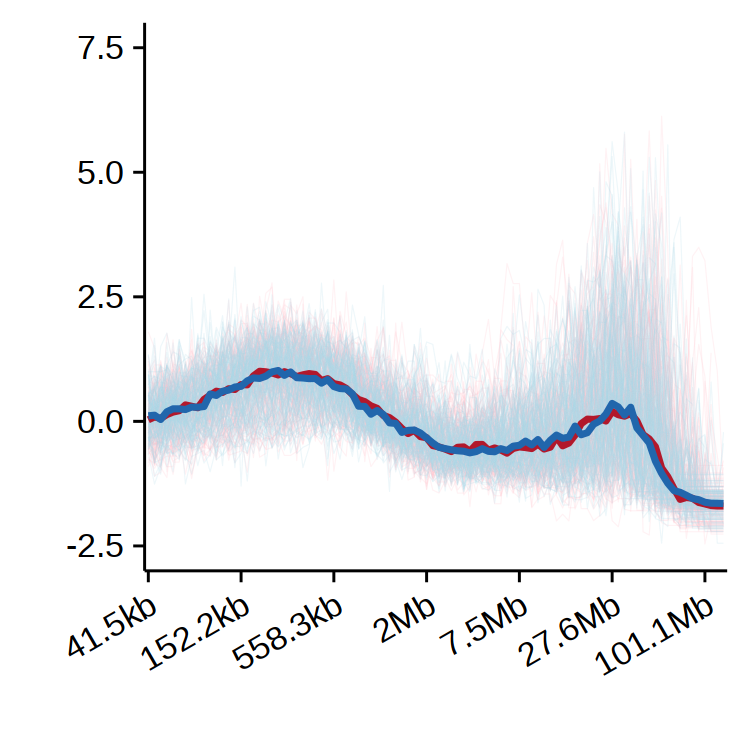

In [20]:
options(repr.plot.width=2.5, repr.plot.height=2.5, repr.plot.res=300)
labels <- curve %>% pull(distance_lab) %>% unique
selected_labels <- labels[seq(1,length(labels),15)]

p1 <- ggplot(curve, aes(x=distance_lab, y=value, group=interaction(cellname, allele), color=allele)) + 
    geom_line(linewidth=0.1) + 
    scale_colour_manual(values = alpha(c("pink","lightblue"),0.2)) +
    stat_summary(
        data = subset(curve, allele == "B6"),
        fun = median,
        geom = "line",
        aes(group = allele),
        color = "#b2182b",
        size = 0.6,
        labels = "B6"
    ) +
    stat_summary(
        data = subset(curve, allele == "Cast"),
        fun = median,
        geom = "line",
        aes(group = allele),
        color = "#2166ac",
        size = 0.6,
        labels = "Cast"
    ) +
    scale_x_discrete(breaks = selected_labels,
    labels = function(x) ifelse(x %in% selected_labels, x, "")) +
    xlab("Genomic distance") + 
    ylab("Scaled contact counts") +
    theme(legend.position = "none",
        text = element_text(family="Arial", size=8),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        axis.line = element_line(color="black", linewidth = 0.25),
        axis.ticks = element_line(color="black", linewidth = 0.25),
        axis.text = element_text(color="black",size=8),
        axis.text.x = element_text(angle = 30, hjust = 1),
        legend.key = element_rect(colour = NA),
        legend.key.width = unit(0.4, "cm"),
        axis.title=element_text(color="black",size=8,face="plain"),
        ) + ylim(-2.5,7.5)

p1

# ggsave("/share/Data/hxie/project/202209/esc_xwliu/esc0312_tidyup/supplement_fig/supp_fig2/figures/Cast_c3_cdps.svg", width = 2, height = 2, units = "in", dpi = 300)

Warning message:
“Removed 4 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 6 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 7 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 4 rows con

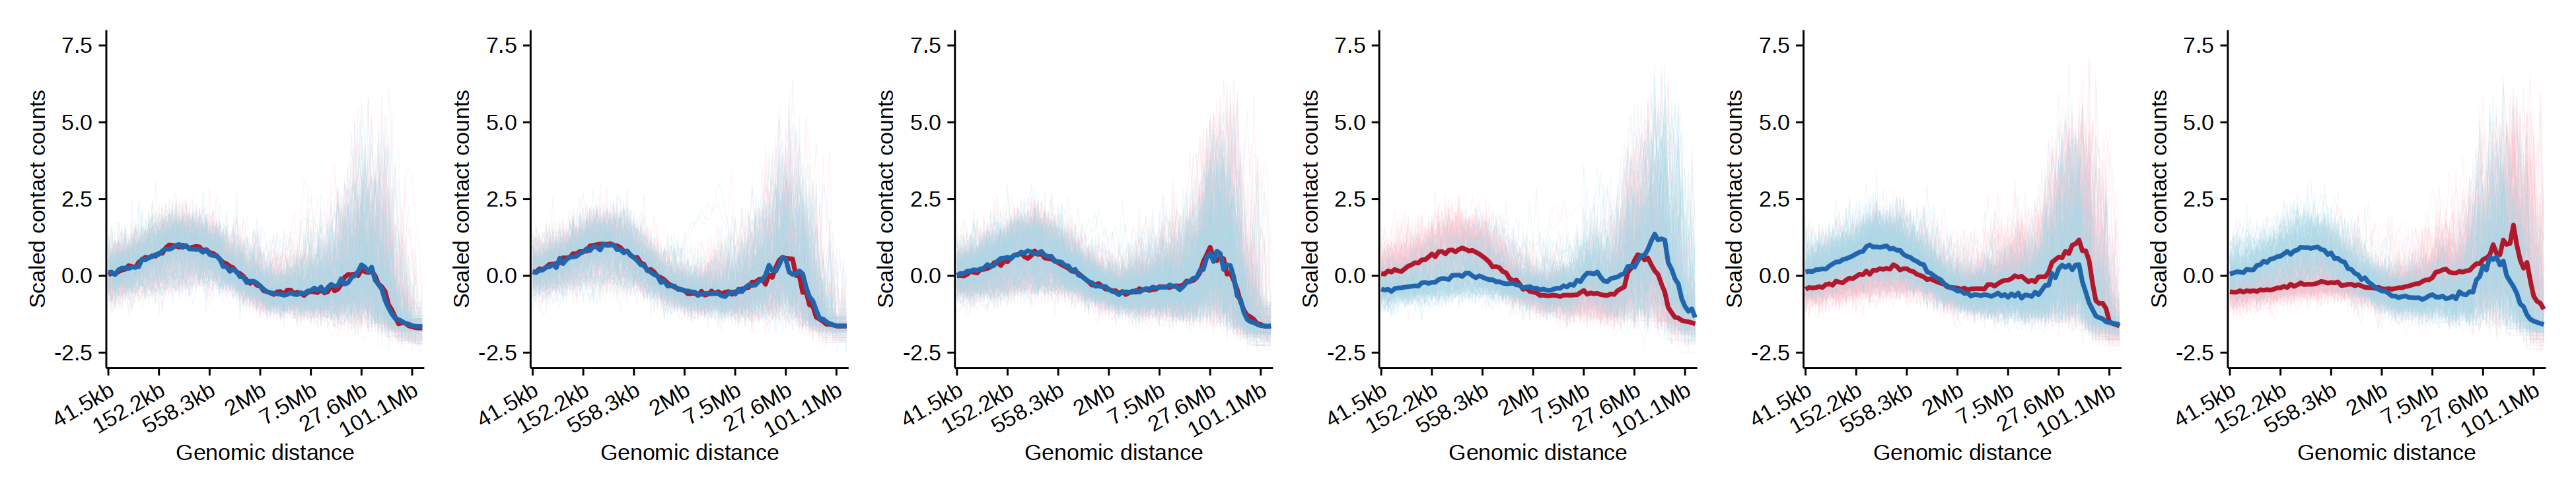

In [62]:
library(patchwork)
options(repr.plot.width=13, repr.plot.height=2.5, repr.plot.res=300)
p <- p0 | p1 | p2 | p3 | p4 | p5 
p
ggsave("/share/Data/hxie/project/202209/esc_xwliu/figures_0827/fig2/fig2F_cdps.svg", width = 13, height = 2.5, units = "in", dpi = 300)